<a href="https://colab.research.google.com/github/medeiroscimario/imersao-analise-de-dados/blob/main/Imers%C3%A3o_%7C_An%C3%A1lise_de_dados_%7C_Parte_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.head(5)

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
mulheres = df.loc[df.Sex == 'female']['Survived']
mulheres

In [ ]:
taxa_mulheres = sum(mulheres) / len(mulheres)
taxa_mulheres

0.7420382165605095

In [ ]:
homens = df.loc[df.Sex == 'male']['Survived']

In [ ]:
taxa_homens = sum(homens) / len(homens)
taxa_homens

0.18890814558058924

<Axes: ylabel='count'>

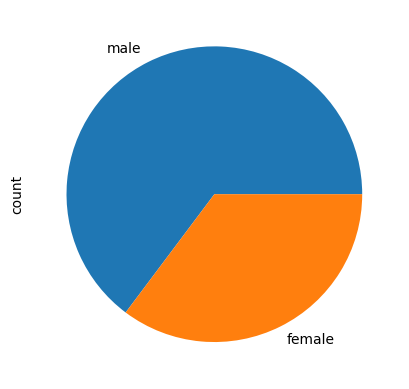

In [ ]:
df['Sex'].value_counts().plot.pie()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# o hue= fará uma comparação
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Total de passageiros por sexo');

<Axes: >

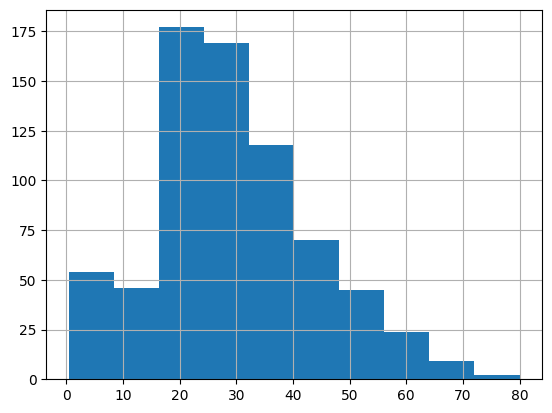

In [ ]:
# Gráficos históricos
df["Age"].hist()

In [ ]:
import plotly.express as px

fig = px.box(df, y="Age")
fig.show()

In [ ]:
# Correlação entre as variáveis
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

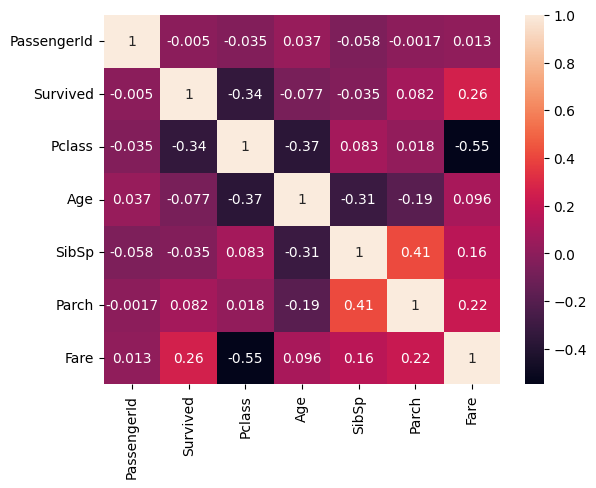

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Pré-processamento

In [ ]:
dados = df.copy()

In [ ]:
dados['Sex'] = dados['Sex'].map({'male':0, 'female':1})

In [ ]:
dados.head(2)

In [ ]:
dados.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
762,763,1,3,"Barah, Mr. Hanna Assi",0,20.0,0,0,2663,7.2292,NaN,C
540,541,1,1,"Crosby, Miss. Harriet R",1,36.0,0,2,WE/P 5735,71.0000,B22,S


In [ ]:
dados.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Retornando as estatísticas descritivas
dados.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dados['Age'] = dados['Age'].fillna(dados['Age'].median())

In [ ]:
dados.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Selecionando as features para o modelo
X = dados.drop(columns=['PassengerId','Survived','Name','Ticket','Cabin','Embarked'])
y = dados['Survived']

In [ ]:
X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((712, 6), (179, 6))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instanciando os classificadores
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

In [ ]:
# Treinando o modelo
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
resultado = random_forest.predict(X_test)

In [ ]:
resultado

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_teste, resultado))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
X_test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare
709,3,0,28.0,1,1,15.2458


In [ ]:
import numpy as np

teste = np.array([[3,0,27.0,0,0,38.5]])

In [ ]:
random_forest.predict(teste)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([0])